In [1]:
import time

from tqdm import tqdm
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from get_randoms import *

---
### Test: Uniformity

In [7]:
def get_random_test(integers: int or list, iterations: int) -> pd.DataFrame:
    
    if type(integers) == int:
        integers = [integers]
        
    data = []
    for n in tqdm(integers):
        i = 0
        while i < iterations:
            st = time.time()
            rand_n, randoms, seed, a, factors, c, coprimes = get_random(n)
            elapsed = round((time.time() - st) * 1000, 3)
            data.append([n, rand_n, randoms, seed, a, factors, c, coprimes, elapsed])
            i += 1
    
    return data

In [9]:
ints = 2 ** 32
iteers = 1000

In [10]:
test_data = get_random_test(ints, iteers)
columns = ['number', 'random_number', 'random_numbers', 'seed', 'multiplier', 'factors', 'increment', 'coprimes', 'elapsed_time']
test_df = pd.DataFrame(test_data, columns=columns)

100%|██████████| 1/1 [30:36<00:00, 1836.98s/it]


In [11]:
test_df.to_csv('test.csv', index=False)

: 

In [25]:
grps = ['seed', 'multiplier', 'increment']
test_df.groupby(grps).count()

number  random_number  random_numbers  factors  \
seed multiplier increment                                                    
0    2          569022300        1              1               1        1   
                884822400        1              1               1        1   
                935319840        1              1               1        1   
                951035904        1              1               1        1   
                1673118720       1              1               1        1   
...                            ...            ...             ...      ...   
1    6700418    1786060800       1              1               1        1   
                2927468544       1              1               1        1   
                3160080000       1              1               1        1   
                3337044480       1              1               1        1   
                3969725760       1              1               1        1   

                            coprimes  elapsed_time  
seed multiplier increment                           
0    2          569022300          1             1  
                884822400          1             1  
                935319840          1             1  
                951035904          1             1  
                1673118720         1             1  
...                              ...           ...  
1    6700418    1786060800         1             1  
                2927468544         1             1  
                3160080000         1             1  
                3337044480         1             1  
                3969725760         1             1  

[100 rows x 6 columns]

In [26]:
test_df.groupby('random_number').count()

,number,random_numbers,seed,multiplier,factors,increment,coprimes,elapsed_time
random_number,,,,,,,,
141983746,1,1,1,1,1,1,1,1
191515114,1,1,1,1,1,1,1,1
194452258,1,1,1,1,1,1,1,1
197217372,1,1,1,1,1,1,1,1
226494541,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
4079834266,1,1,1,1,1,1,1,1
4083848913,1,1,1,1,1,1,1,1
4140078958,1,1,1,1,1,1,1,1


In [27]:
test_df.groupby('multiplier').count()

,number,random_number,random_numbers,seed,factors,increment,coprimes,elapsed_time
multiplier,,,,,,,,
2,21,21,21,21,21,21,21,21
642,37,37,37,37,37,37,37,37
6700418,42,42,42,42,42,42,42,42


In [28]:
test_df.groupby('increment').count()

,number,random_number,random_numbers,seed,multiplier,factors,coprimes,elapsed_time
increment,,,,,,,,
235243008,1,1,1,1,1,1,1,1
241473960,1,1,1,1,1,1,1,1
242902800,1,1,1,1,1,1,1,1
259459200,1,1,1,1,1,1,1,1
279417600,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
3990729600,1,1,1,1,1,1,1,1
4043753280,1,1,1,1,1,1,1,1
4102358400,1,1,1,1,1,1,1,1


In [29]:
test_df.groupby('elapsed_time').count()

,number,random_number,random_numbers,seed,multiplier,factors,increment,coprimes
elapsed_time,,,,,,,,
1.184,1,1,1,1,1,1,1,1
1.189,2,2,2,2,2,2,2,2
1.190,1,1,1,1,1,1,1,1
1.196,1,1,1,1,1,1,1,1
1.198,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...
2620.469,1,1,1,1,1,1,1,1
2623.521,1,1,1,1,1,1,1,1
2660.062,1,1,1,1,1,1,1,1


/var/folders/f4/f951yrr956gfypynphwmvfvc0000gn/T/ipykernel_63472/1524037187.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_df)


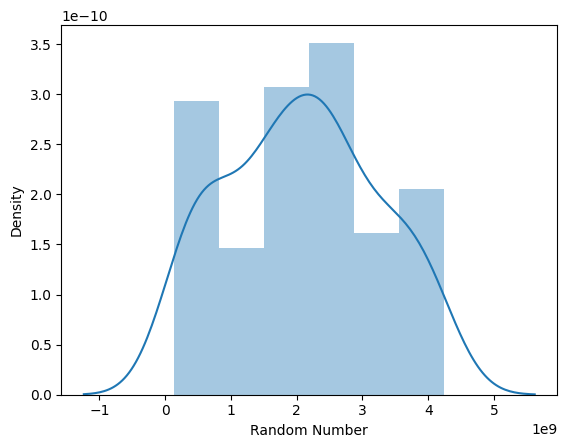

In [56]:
data_df = test_df.loc[:, ['random_number']]
ax = sns.distplot(data_df)
ax.set(xlabel='Random Number', ylabel='Density')
plt.show()

/var/folders/f4/f951yrr956gfypynphwmvfvc0000gn/T/ipykernel_63472/2333582270.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_df)


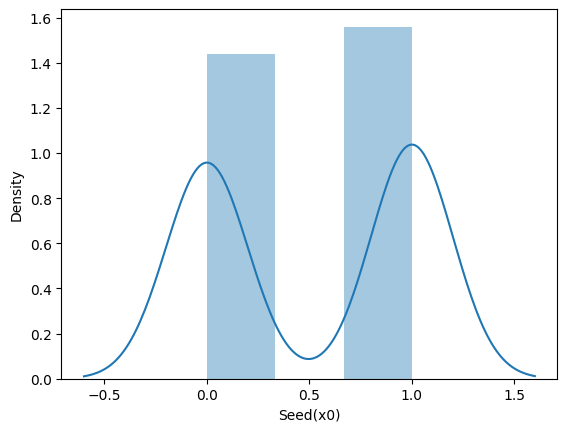

In [55]:
data_df = test_df.loc[:, ['seed']]
ax = sns.distplot(data_df)
ax.set(xlabel='Seed(x0)', ylabel='Density')
plt.show()

/var/folders/f4/f951yrr956gfypynphwmvfvc0000gn/T/ipykernel_63472/4221049820.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_df)


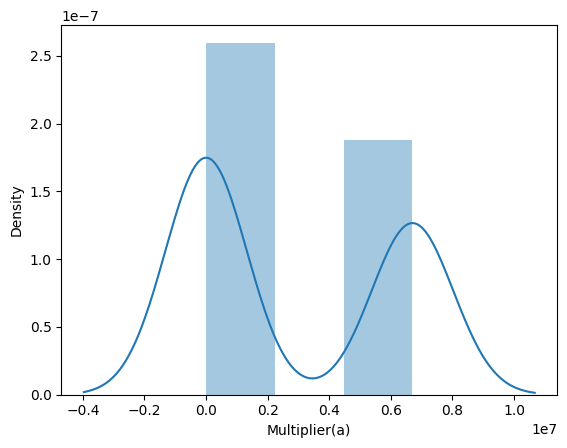

In [57]:
data_df = test_df.loc[:, ['multiplier']]
ax = sns.distplot(data_df)
ax.set(xlabel='Multiplier(a)', ylabel='Density')
plt.show()

/var/folders/f4/f951yrr956gfypynphwmvfvc0000gn/T/ipykernel_63472/2467431679.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_df)


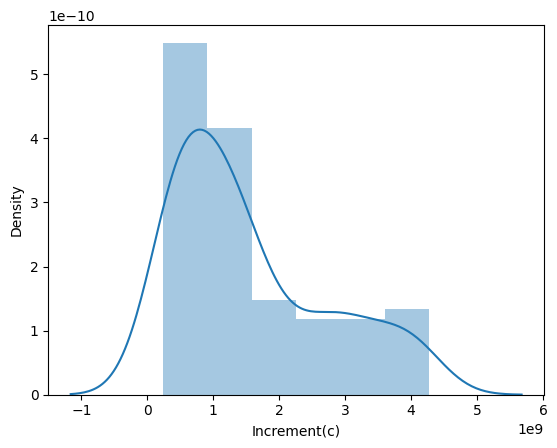

In [58]:
data_df = test_df.loc[:, ['increment']]
ax = sns.distplot(data_df)
ax.set(xlabel='Increment(c)', ylabel='Density')
plt.show()

/var/folders/f4/f951yrr956gfypynphwmvfvc0000gn/T/ipykernel_63472/569135190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_df)


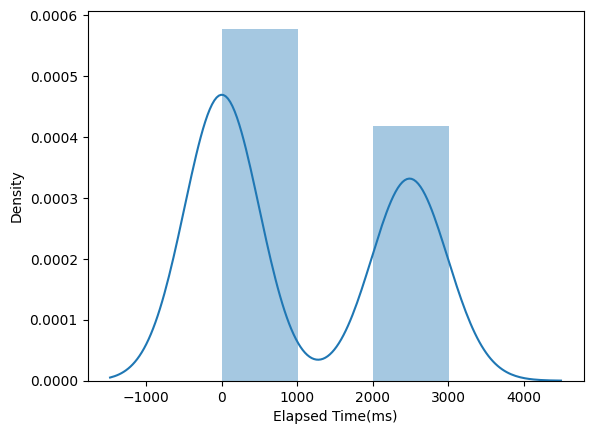

In [59]:
data_df = test_df.loc[:, ['elapsed_time']]
ax = sns.distplot(data_df)
ax.set(xlabel='Elapsed Time(ms)', ylabel='Density')
plt.show()

In [22]:
# n = 10
# interations = 10 ** n
# interations = 6700418

# x = 1
# a, c, m = 23434, 4223423, 4234211

# randoms = []
# i = 0
# # while i < interations:
# for i in  tqdm(range(interations)):
#     x = (a * x + c) % m
#     randoms.append(x)
#     # i += 1